# Exploratory Data Analysis of Honey Bee Viruses

This notebook explores the cleaned virus data to identify trends and patterns.
It will:
- Explore and summarise general information from the dataset
- Visualise correlations and distributions of virus occurrences

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("../data/bee_virus_data_cleaned.csv")
data.head()

,No,Sample,ABPV,BQCV,CBPV,DWV,SBV,Region,Sample Type
0,776 A,1A,negative,weak positive,negative,positive,positive,Bács-Kiskun,Adult
1,776 B,1B,negative,negative,negative,negative,negative,Bács-Kiskun,Brood
2,776 C,2A,positive,negative,negative,positive,positive,Bács-Kiskun,Adult
3,776 D,2B,positive,negative,negative,positive,negative,Bács-Kiskun,Brood
4,776 E,3A,positive,negative,negative,positive,weak positive,Bács-Kiskun,Adult


In [36]:
print("Dataset info: ")
print(data.shape)
print(data.info())
print(data.describe())

Dataset info: 
(373, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No           373 non-null    object
 1   Sample       373 non-null    object
 2   ABPV         373 non-null    object
 3   BQCV         373 non-null    object
 4   CBPV         373 non-null    object
 5   DWV          373 non-null    object
 6   SBV          373 non-null    object
 7   Region       373 non-null    object
 8   Sample Type  373 non-null    object
dtypes: object(9)
memory usage: 26.4+ KB
None
           No Sample      ABPV      BQCV      CBPV       DWV       SBV  \
count     373    373       373       373       373       373       373   
unique    373     40         3         3         3         3         3   
top     798 F     1A  positive  negative  negative  negative  negative   
freq        1     19       201       279       370       170       187   

    

In [37]:
print("Total number of samples: ", data["No"].count())
print("")
print("Number of Regions: ",len(data["Region"].unique()))
print("")
print("Sample Types: ", data["Sample Type"].unique())
print("")
print("Virus results:")
print(data[['ABPV', 'BQCV', 'CBPV', 'DWV', 'SBV']].apply(pd.Series.value_counts))

Total number of samples:  373

Number of Regions:  19

Sample Types:  ['Adult' 'Brood']

Virus results:
               ABPV  BQCV  CBPV  DWV  SBV
negative        106   279   370  170  187
positive        201    58     1  136  128
weak positive    66    36     2   67   58


In [38]:
print("Simplified virus results:")
virus_columns = ['ABPV', 'BQCV', 'CBPV', 'DWV', 'SBV']
for virus in virus_columns:
    data[virus] = data[virus].replace({"weak positive": "positive"})
print(data[['ABPV', 'BQCV', 'CBPV', 'DWV', 'SBV']].apply(pd.Series.value_counts))

print("")
positive_percentages = (
    data[['ABPV', 'BQCV', 'CBPV', 'DWV', 'SBV']]
    .apply(lambda col: (col == "positive").mean() * 100)
)
print("Percentage of samples positive for each virus:")
print(positive_percentages)

Simplified virus results:
          ABPV  BQCV  CBPV  DWV  SBV
negative   106   279   370  170  187
positive   267    94     3  203  186

Percentage of samples positive for each virus:
ABPV    71.581769
BQCV    25.201072
CBPV     0.804290
DWV     54.423592
SBV     49.865952
dtype: float64


## Some Observations
- Dataset contains 373 samples from 19 regions
- Viruses statuses include "negative", "positive", "weak positive"
- There are 2 sample types: "Adult" and "Brood"
- ABPV occurs most frequently (71.58%)
- CBPV occurs least frequently (0.80%)

      ABPV  BQCV  CBPV  DWV  SBV
ABPV     0    79     2  161  157
BQCV    79     0     1   56   65
CBPV     2     1     0    2    1
DWV    161    56     2    0  120
SBV    157    65     1  120    0


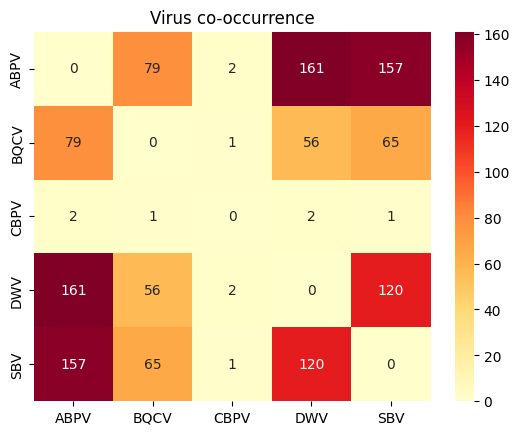

In [40]:
# Virus co-occurrence
binary_data = data[virus_columns].apply(lambda x: (x == "positive").astype(int))
co_occurrence_matrix = binary_data.T.dot(binary_data)

for i in range(len(co_occurrence_matrix)):
    co_occurrence_matrix.iloc[i, i] = 0
print(co_occurrence_matrix)
    
sns.heatmap(co_occurrence_matrix, cmap="YlOrRd", annot=True, fmt="d")
plt.title("Virus co-occurrence")
plt.show()

0     46
1     82
2    101
3    107
4     37
Name: count, dtype: int64


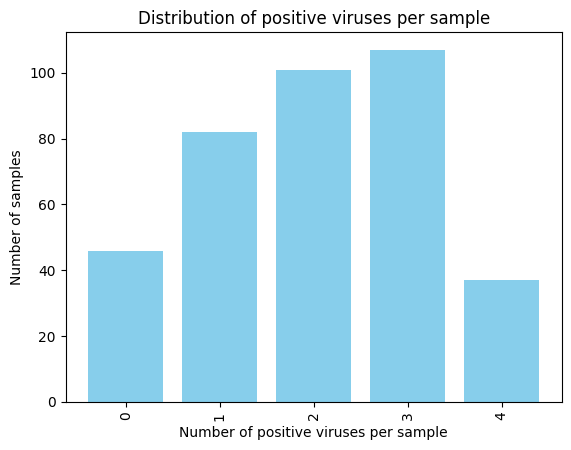

In [41]:
# Count number of positive viruses per sample
num_positive_viruses_per_sample = binary_data.sum(axis=1)
positives_count = num_positive_viruses_per_sample.value_counts().sort_index()
print(positives_count)
plt.bar(positives_count.index, positives_count.values, color="skyblue")
plt.title("Distribution of positive viruses per sample")
plt.xlabel("Number of positive viruses per sample")
plt.ylabel("Number of samples")
plt.xticks(positives_count.index, rotation=90)
plt.show()